# Laboratorium 3
## Singular Value Decomposition
Natalia Brzozowska

# Zadanie 1 Przekształcenie sfery w elipsoide
    1. Korzystajac z równania parametrycznego narysuj sfere jednostkowa w 3D

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [422]:
def x(s,t):
    return np.cos(s)*np.sin(t)

def y(s,t):
    return np.sin(s)*np.sin(t)

def z(t):
    return np.cos(t)

def sphere(n):
    s=np.linspace(0,2*np.pi,n)
    t=np.linspace(0,np.pi,n)
    s_m,t_m=np.meshgrid(s,t)
    
    xv=x(s_m,t_m)
    yv=y(s_m,t_m)
    zv=z(t_m)
    
    fig = plt.figure(figsize =[9,9] )
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(xv,yv,zv)
    ax.set_title('sphere')
    plt.show()
    return np.array([xv.flatten(),yv.flatten(),zv.flatten()])
    

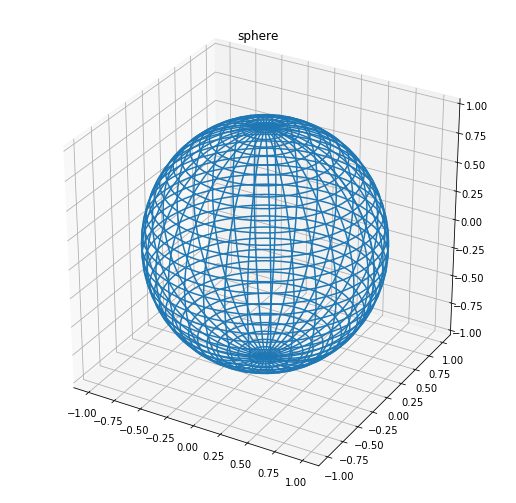

In [423]:
sph= sphere(70)

    2. Wygeneruj 3 rózne macierze A1,A2,A3, (Ai <- R3×3), za ich pomoca 
    dokonaj przekształcenia sfery w elipsoide, a nastepnie przedstaw 
    wizualizacje uzyskanego wyniku.

In [425]:
A1=np.random.randint(1,5,size=(3,3))
A2=np.random.randint(1,5,size=(3,3))
A3=np.random.randint(1,5,size=(3,3))

In [458]:
def z2(s,t):
    return np.cos(t)*s

def elipsoid(n,A):
    s=np.linspace(0,2*np.pi,n)
    t=np.linspace(0,np.pi,n)
    s_m,t_m=np.meshgrid(s,t)

    xv=x(s_m,t_m).flatten()
    yv=y(s_m,t_m).flatten()
    zv=z2(np.ones(n,),t_m).flatten()

    MT=np.array([xv,yv,zv])
    elips=A @ MT

    fig = plt.figure(figsize =[9,9] )
    ax = plt.axes(projection='3d')
    
    ax.plot3D(elips[0],elips[1],elips[2])
    ax.set_title('elipsoid')
    plt.show()
    return elips

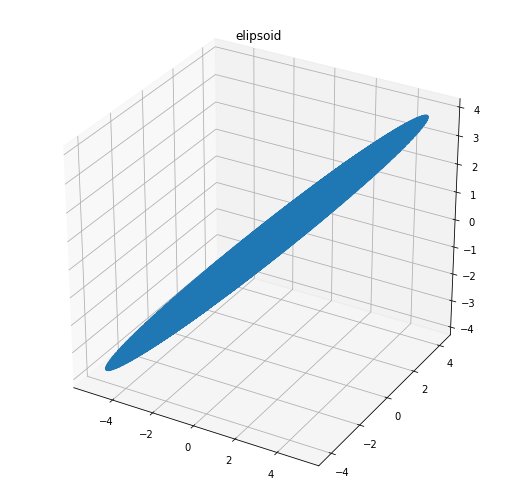

In [459]:
E1=elipsoid(60,A1)

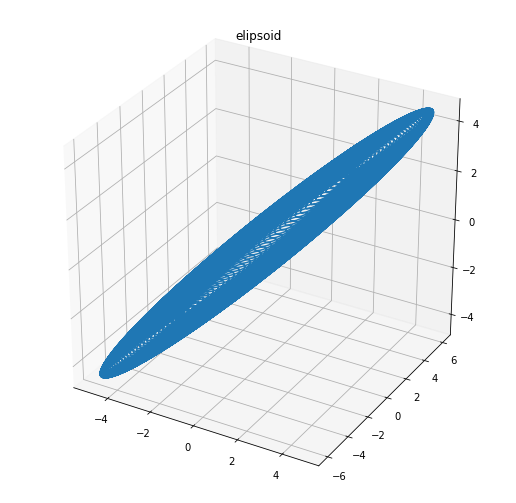

In [460]:
E2=elipsoid(100,A2)

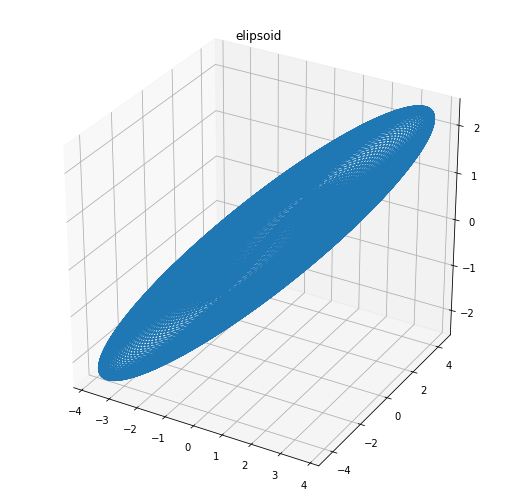

In [461]:
E3=elipsoid(100,A3)

    3. Dokonaj rozkładu według wartosci osobliwych (SVD) kazdej macierzy Ai.
    Na wykresie elipsoidy odpowiadajacej przekształceniu Ai dodaj wizualizacje jej półosi wyznaczonych za pomoca SVD.

In [462]:
u1, s1, vh1 = np.linalg.svd(A1)
u2, s2, vh2 = np.linalg.svd(A2)
u3, s3, vh3 = np.linalg.svd(A3)

In [463]:
def SVD_plot(S, P, U,n):  
    x_start, y_start, z_start = [0,0,0]
    vec=U@(np.diag(S))
    x_end=vec[0]
    y_end=vec[1]
    z_end=vec[2]

    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca(projection='3d')
    
    ax.plot3D(P[0], P[1], P[2], color='lightblue')
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
    
    plt.show()


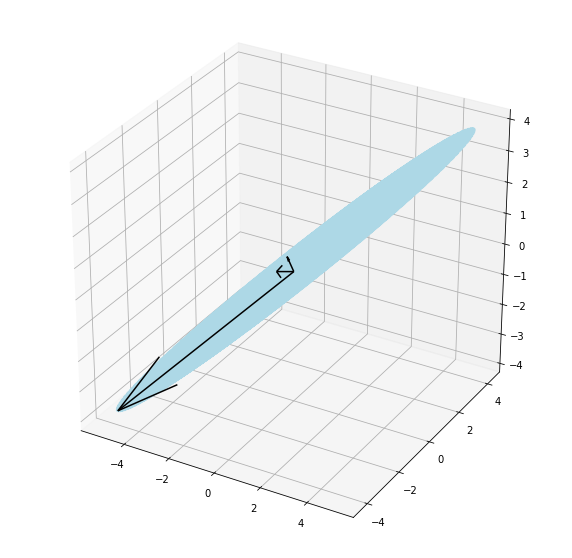

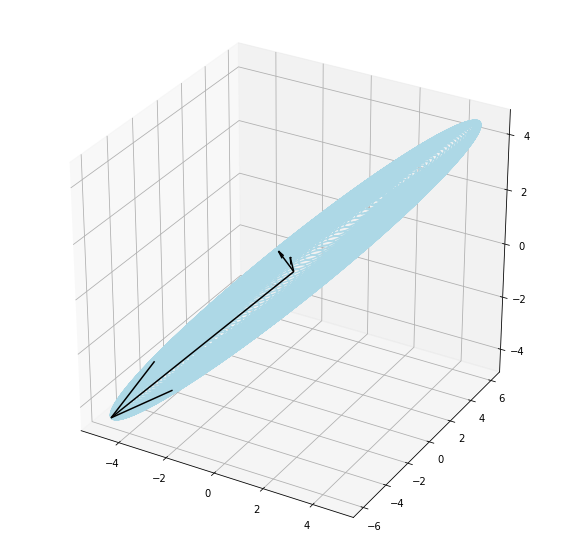

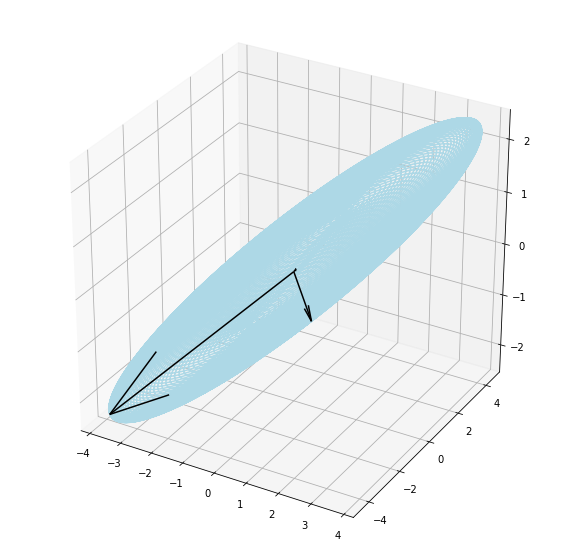

In [464]:
SVD_plot(s1, E1, u1,20)
SVD_plot(s2, E2, u2,20)
SVD_plot(s3, E3, u3,20)

    4. Znajdz taka macierz Ai, aby stosunek jej najwiekszej i najmniejszej
    wartosci osobliwej był wiekszy od 100. Narysuj odpowiadajaca jej elipsoide.

In [465]:
def find_matrix():
    matrix=np.random.randint(1,5,size=(3,3))
    u,s,v = np.linalg.svd(matrix)
    while((np.max(s)/np.min(s))<100):
        matrix=np.random.randint(1,5,size=(3,3))
        u,s,v = np.linalg.svd(matrix)
    print(matrix)
    print(s)
    elipsoid(50,matrix)
    return matrix

[[2 4 2]
 [4 1 4]
 [1 1 1]]
[7.20794689e+00 2.83645934e+00 4.94481963e-17]


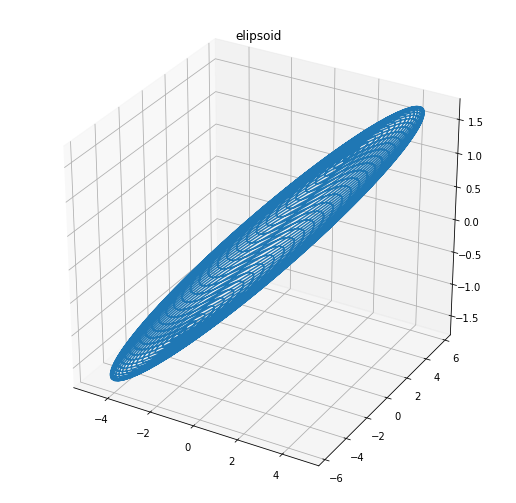

In [466]:
NM = find_matrix()

In [435]:
NM

array([[4, 4, 1],
       [4, 4, 1],
       [4, 2, 2]])

    5. Dla wybranej macierzy Ai przedstaw podane wizualizacje 

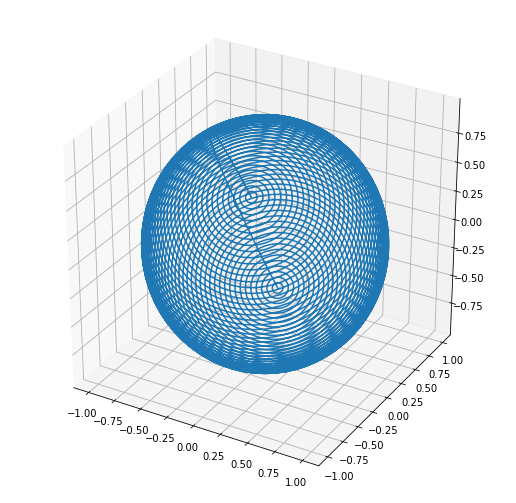

In [441]:
u,sig,v = np.linalg.svd(NM)
m1=v@sph

fig = plt.figure(figsize =[9,9] )
ax = plt.axes(projection='3d')
ax.plot3D(m1[0],m1[1],m1[2])
plt.show()

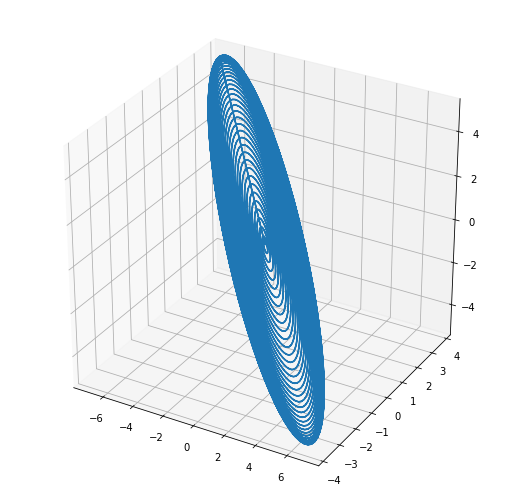

In [454]:
ma=(sig*v)@sph
fig = plt.figure(figsize =[9,9] )
ax = plt.axes(projection='3d')
ax.plot3D(ma[0],ma[1],ma[2])
plt.show()

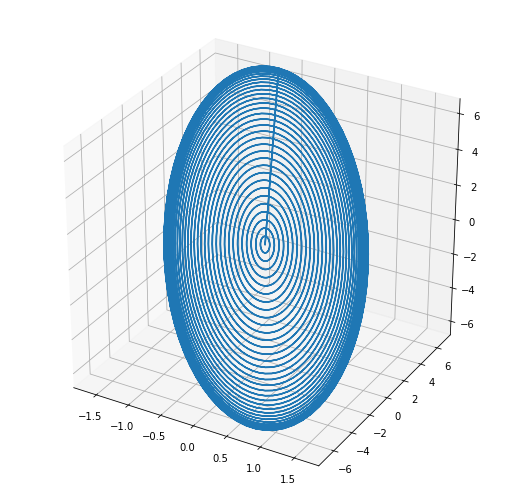

In [457]:
m3=(np.dot(u,sig*v))@sph
fig = plt.figure(figsize =[9,9] )
ax = plt.axes(projection='3d')
ax.plot3D(m3[0],m3[1],m3[2])
plt.show()

# Zadanie 2
    1. Przygotuj przykładowe zdjecie o rozmiarze 512 × 512 pikseli (np. 
    Lenna image)

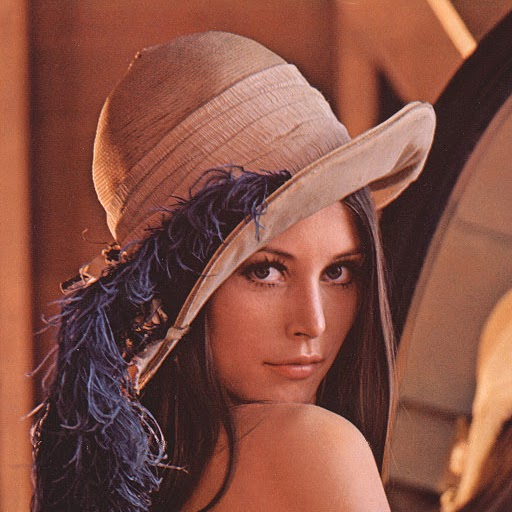

In [262]:
from IPython.display import Image
Image("lena.jpg")

    2. Oblicz SVD macierzy pikseli I, a nastepnie dokonaj przyblizenia tej
    macierzy za pomoca low rank approximation (k pierwszych wartosci
    osobliwych) uzyskujac kompresje obrazu wejsciowego.

In [70]:
import imageio
from PIL import Image

img = imageio.imread('lena.jpg')
imgarr=np.array(img)
print(img.shape)
print(imgarr)

(512, 512, 3)
[[[194 110  73]
  [200 116  79]
  [194 110  73]
  ...
  [148  77  55]
  [146  78  55]
  [146  78  55]]

 [[195 111  75]
  [198 114  78]
  [196 112  76]
  ...
  [146  78  55]
  [148  80  57]
  [148  82  58]]

 [[197 113  77]
  [195 111  75]
  [198 114  78]
  ...
  [148  80  57]
  [149  81  58]
  [149  83  59]]

 ...

 [[167  90  62]
  [166  89  59]
  [171  94  64]
  ...
  [ 68  38  36]
  [ 68  38  36]
  [ 69  39  37]]

 [[164  87  57]
  [166  89  59]
  [168  91  61]
  ...
  [ 68  38  36]
  [ 69  38  36]
  [ 73  42  40]]

 [[158  81  51]
  [164  87  57]
  [166  89  59]
  ...
  [ 68  38  36]
  [ 70  39  37]
  [ 76  45  43]]]


In [113]:
def img_compress(k):
    red=imgarr[:,:,0]
    green=imgarr[:,:,1]
    blue=imgarr[:,:,2]
    
    redcomp=Image.fromarray(low_rank_appr(k,red))
    greencomp=Image.fromarray(low_rank_appr(k,green))
    bluecomp=Image.fromarray(low_rank_appr(k,blue))

    newimg=Image.merge("RGB", (redcomp,greencomp,bluecomp))
    print(k)
    plt.figure(figsize = (9,9))
    plt.imshow(newimg)
    plt.show()
        
    

def low_rank_appr(k,arr):
    U,D,V=np.linalg.svd(arr)
    prod= np.matmul((U[:, :k]), np.diag(D[:k]))
    prod2=np.matmul(prod,(V[:k, :]))
    product=prod2.astype('uint8')
    return product

def compress():
    for i in [2,10,30,50,100,200,300,400,500]:
        img_compress(i)

2


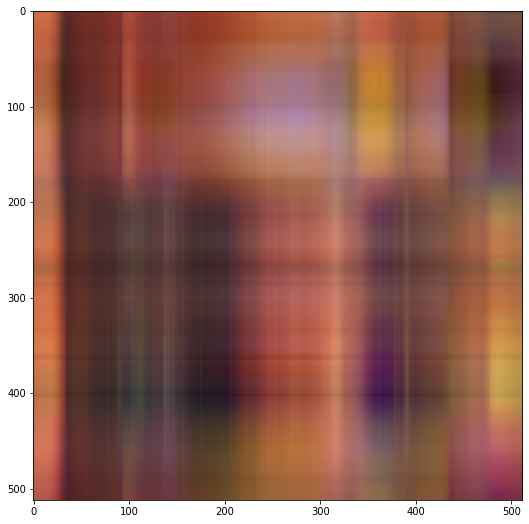

10


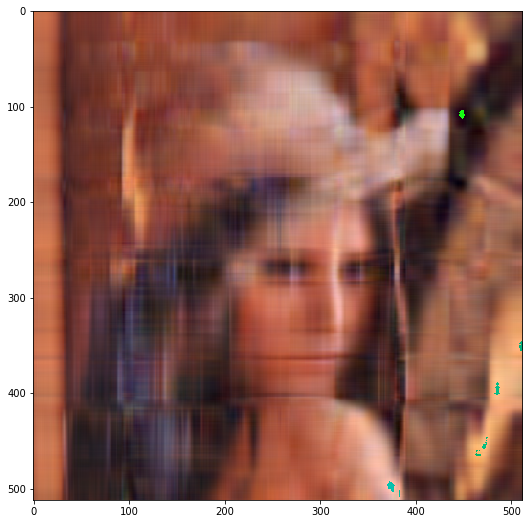

30


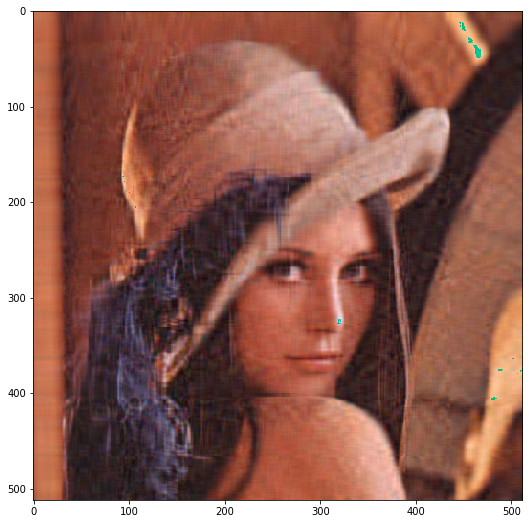

50


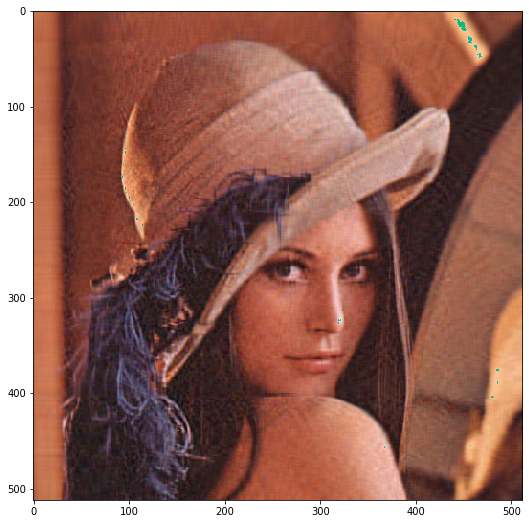

100


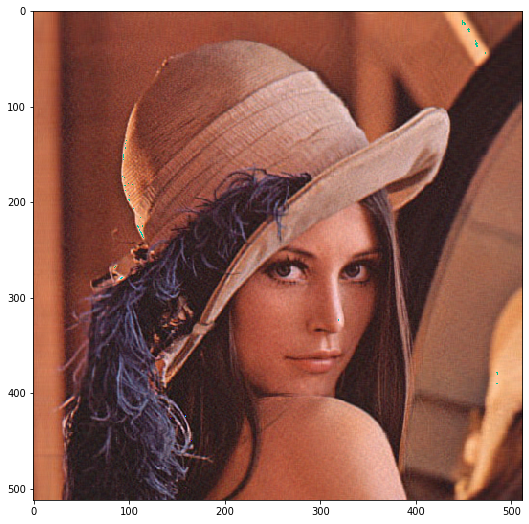

200


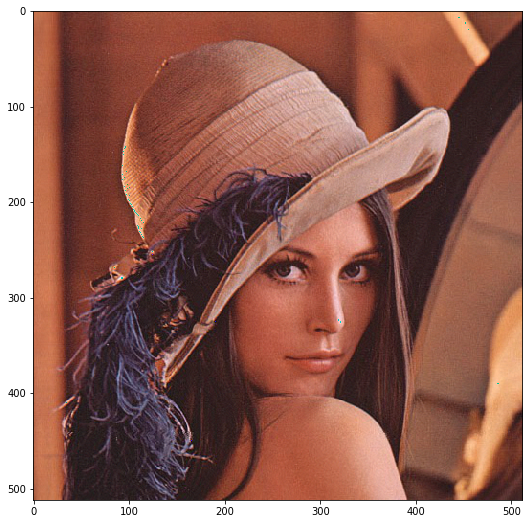

300


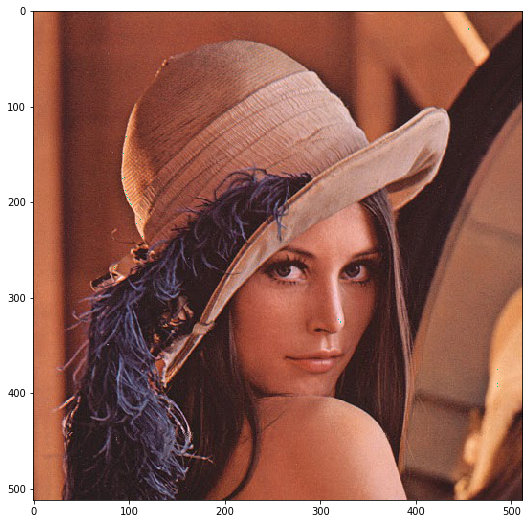

400


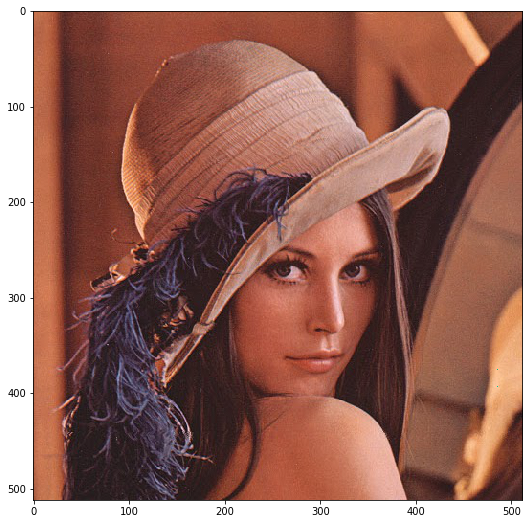

500


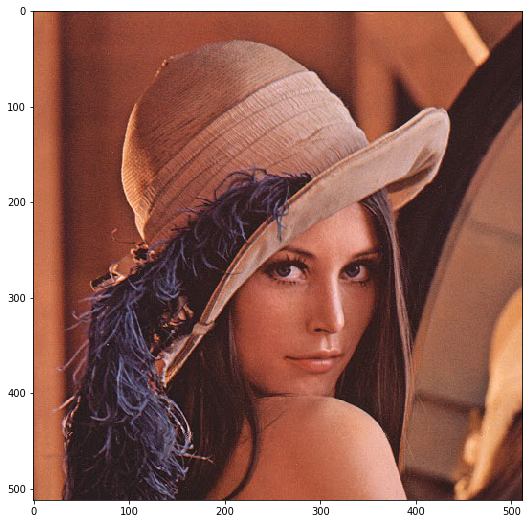

In [114]:
compress()

    Powyżej obrazków jest wartość zapisana wartość k dla danego obrazu.
    Można zaobserwować, że dla większych wartości k skompresowany obraz 
    bardziej przypomina obraz orginalny. W zasadzie już przy k=200 obraz 
    jest prawie identyczny, poza małymi zielonymi niedoskonałościami.